In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import streamlit as st
import warnings

warnings.filterwarnings(action='ignore')

Loading in Dataset


In [167]:
League = pd.read_csv('2023_LoL_esports_match_data_from_OraclesElixir.csv')

Dropping any 'partial' data points


In [168]:

print(pd.unique(League.datacompleteness))
League = League[League['datacompleteness'] == 'complete']
print(pd.unique(League.datacompleteness))


['complete' 'partial']
['complete']


Dropping any 'team' data points

In [169]:
print(pd.unique(League.position))
League = League[League['position'] == 'team']
print(pd.unique(League.position))

['top' 'jng' 'mid' 'bot' 'sup' 'team']
['team']


## 각 팀별 데이터에서 필요한 열만 추출

In [170]:
League = League[['teamname', 'result', 'firstdragon', 'firstherald', 'firstbaron', 'dragons', 'heralds', 'barons']]
League['dragon_buff'] = (League['dragons'] >= 4.0) * 1
League

,teamname,result,firstdragon,firstherald,firstbaron,dragons,heralds,barons,dragon_buff
10,Klanik Esport,1,0.0,1.0,1.0,4.0,2.0,1.0,1
11,MS Company,0,1.0,0.0,0.0,3.0,0.0,0.0,0
22,beGenius ESC,0,0.0,1.0,1.0,3.0,2.0,2.0,0
23,ViV Esport,1,1.0,0.0,0.0,4.0,0.0,1.0,1
34,Team du Sud,1,0.0,0.0,0.0,4.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
119135,Movistar Riders,1,0.0,1.0,0.0,4.0,2.0,1.0,1
119146,Macko Esports,0,1.0,1.0,0.0,2.0,1.0,0.0,0
119147,Movistar Riders,1,0.0,0.0,1.0,2.0,1.0,2.0,0
119158,Macko Esports,0,1.0,0.0,0.0,1.0,1.0,0.0,0


## 평균 오브젝트 처치율과 승률 DataFrame 생성

In [171]:
League_Object = League.groupby('teamname').agg({'result':'mean'}).sort_values('result')
League_Object['count'] = League.groupby('teamname').agg({'result':'count'})
League_Object['firstdragon'] = League.groupby('teamname').agg({'firstdragon':'mean'})
League_Object['firstherald'] = League.groupby('teamname').agg({'firstherald':'mean'})
League_Object['firstbaron'] = League.groupby('teamname').agg({'firstbaron':'mean'})
League_Object['dragons'] = League.groupby('teamname').agg({'dragons' : 'mean'})
League_Object['heralds'] = League.groupby('teamname').agg({'heralds' : 'mean'})
League_Object['barons'] = League.groupby('teamname').agg({'barons' : 'mean'})
League_Object['dragon_buff'] = League.groupby('teamname').agg({'dragon_buff' : 'mean'})
League_Object.drop(League_Object[(League_Object['count'] < 20)].index, inplace=True)

League_Object

,result,count,firstdragon,firstherald,firstbaron,dragons,heralds,barons,dragon_buff
teamname,,,,,,,,,
T1 Academy,0.040000,25,0.360000,0.280000,0.080000,0.800000,0.600000,0.120000,0.040000
CLG Faith,0.057143,35,0.400000,0.228571,0.114286,1.114286,0.485714,0.171429,0.057143
V3 Esports,0.081633,49,0.387755,0.326531,0.142857,1.040816,0.530612,0.224490,0.020408
Boavista FC,0.107143,28,0.571429,0.250000,0.142857,1.571429,0.428571,0.178571,0.071429
Dewish Team,0.111111,36,0.361111,0.500000,0.194444,1.250000,0.750000,0.305556,0.083333
...,...,...,...,...,...,...,...,...,...
Saprissa Esports,0.790698,43,0.534884,0.697674,0.627907,2.372093,1.279070,0.930233,0.162791
Team du Sud,0.803922,51,0.568627,0.705882,0.666667,2.490196,1.294118,0.882353,0.176471
Fukuoka Softbank HAWKS gaming Academy,0.814815,27,0.703704,0.629630,0.629630,1.777778,1.407407,0.777778,0.074074


첫 오브젝트를 먹었을 때의 승률 계산

In [172]:
League_Object['firstdragon_win'] = League.drop(League[(League['firstdragon'] == 0)].index).groupby('teamname').agg({'result':'mean'})
League_Object['firstherald_win'] = League.drop(League[(League['firstherald'] == 0)].index).groupby('teamname').agg({'result':'mean'})
League_Object['firstbaron_win'] = League.drop(League[(League['firstbaron'] == 0)].index).groupby('teamname').agg({'result':'mean'})

League_Object

,result,count,firstdragon,firstherald,firstbaron,dragons,heralds,barons,dragon_buff,firstdragon_win,firstherald_win,firstbaron_win
teamname,,,,,,,,,,,,
T1 Academy,0.040000,25,0.360000,0.280000,0.080000,0.800000,0.600000,0.120000,0.040000,0.111111,0.000000,0.500000
CLG Faith,0.057143,35,0.400000,0.228571,0.114286,1.114286,0.485714,0.171429,0.057143,0.071429,0.125000,0.500000
V3 Esports,0.081633,49,0.387755,0.326531,0.142857,1.040816,0.530612,0.224490,0.020408,0.157895,0.187500,0.428571
Boavista FC,0.107143,28,0.571429,0.250000,0.142857,1.571429,0.428571,0.178571,0.071429,0.125000,0.142857,0.750000
Dewish Team,0.111111,36,0.361111,0.500000,0.194444,1.250000,0.750000,0.305556,0.083333,0.307692,0.111111,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...
Saprissa Esports,0.790698,43,0.534884,0.697674,0.627907,2.372093,1.279070,0.930233,0.162791,0.782609,0.833333,0.962963
Team du Sud,0.803922,51,0.568627,0.705882,0.666667,2.490196,1.294118,0.882353,0.176471,0.931034,0.777778,0.970588
Fukuoka Softbank HAWKS gaming Academy,0.814815,27,0.703704,0.629630,0.629630,1.777778,1.407407,0.777778,0.074074,0.842105,0.823529,0.882353


In [173]:
FirstObj_Win = pd.DataFrame({'type':['firstdragon', 'firstherald', 'firstbaron'],
                              'win_rate':[np.average(League_Object['firstdragon_win']), np.average(League_Object['firstherald_win']), np.average(League_Object['firstbaron_win'])]})

FirstObj_Win

,type,win_rate
0,firstdragon,0.605035
1,firstherald,0.564210
2,firstbaron,0.820575


## 첫 오브젝트와 승률의 관계

첫 용과 승률

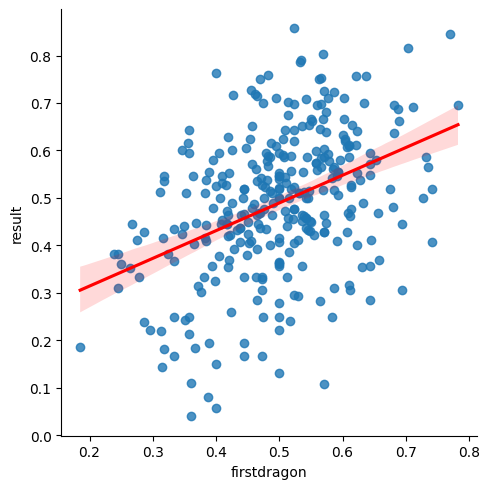

In [174]:
sb.lmplot(x="firstdragon", y="result", data=League_Object, line_kws={'color' : 'red'})

첫 전령과 승률

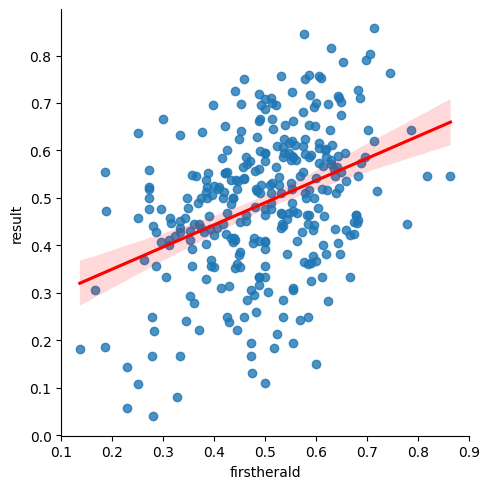

In [175]:
fig = sb.lmplot(x="firstherald", y="result", data=League_Object, line_kws={'color' : 'red'})

첫 바론과 승률

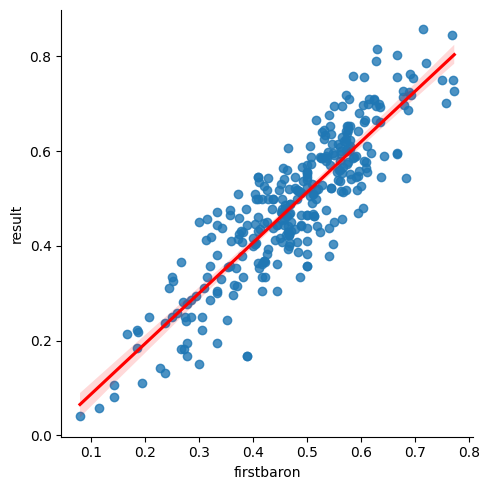

In [176]:
fig = sb.lmplot(x="firstbaron", y="result", data=League_Object, line_kws={'color' : 'red'})

첫 오브젝트와 승률 비교

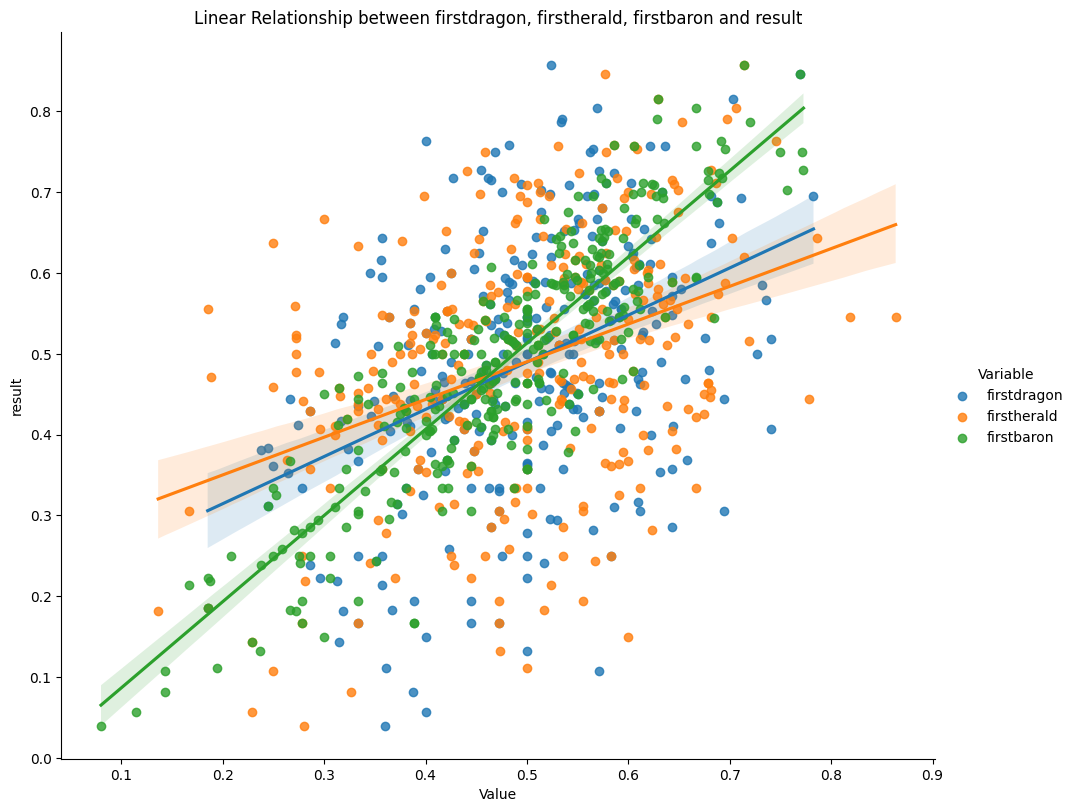

In [177]:
df_long = pd.melt(League_Object, id_vars=['result'], value_vars=['firstdragon', 'firstherald', 'firstbaron'], 
                  var_name='Variable', value_name='Value')
sb.lmplot(x='Value', y='result', hue='Variable', data=df_long, height=8, aspect=1.2)
plt.title('Linear Relationship between firstdragon, firstherald, firstbaron and result')

plt.show()

첫 오브젝트 처치 시 승률

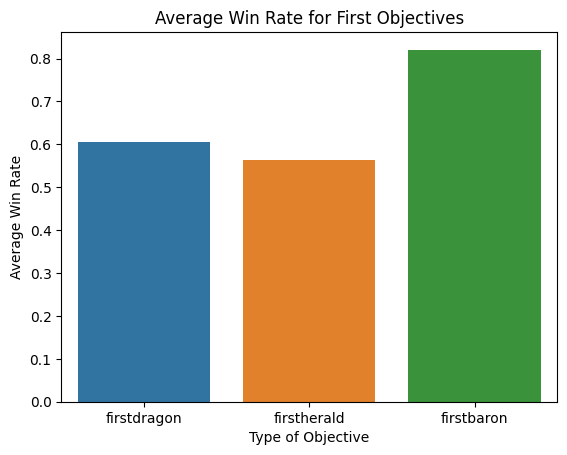

In [185]:
FirstObj_Win = pd.DataFrame({
    'type': ['firstdragon', 'firstherald', 'firstbaron'],
    'win_rate': [
        np.average(League_Object['firstdragon_win']),
        np.average(League_Object['firstherald_win']),
        np.average(League_Object['firstbaron_win'])
    ]
})

sb.barplot(x='type', y='win_rate', data=FirstObj_Win)

plt.title('Average Win Rate for First Objectives')
plt.xlabel('Type of Objective')
plt.ylabel('Average Win Rate')

plt.show()

## 용 버프와 승률의 관계

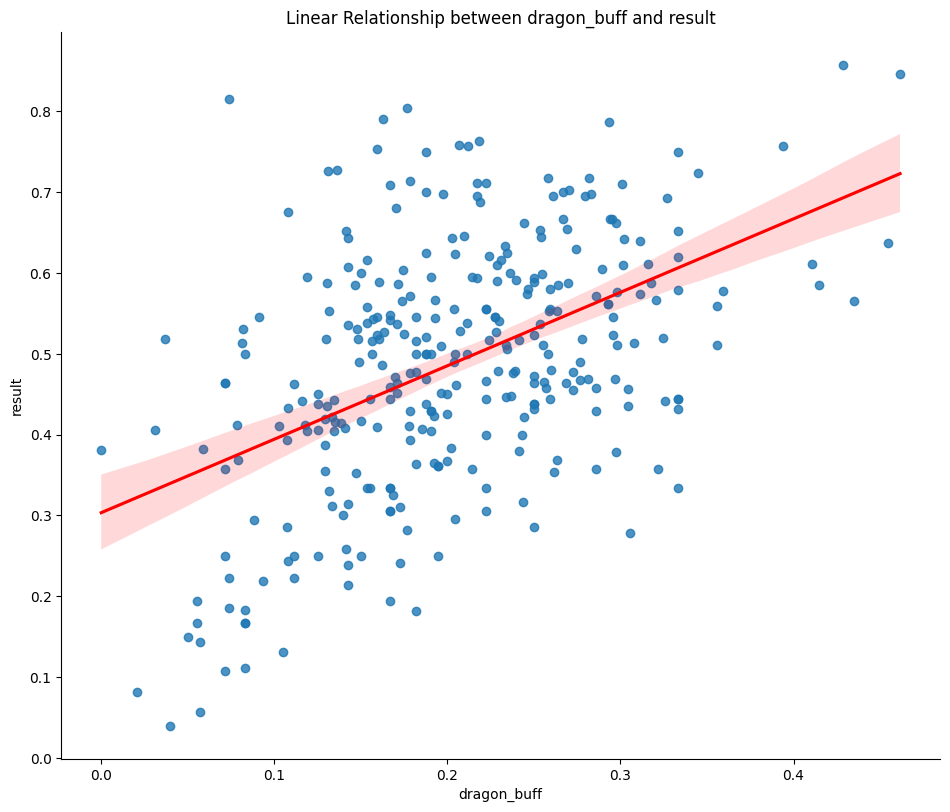

In [179]:
sb.lmplot(x='dragon_buff', y='result', data=League_Object, height=8, aspect=1.2, line_kws={'color' : 'red'})
plt.title('Linear Relationship between dragon_buff and result')

plt.show()

## 처치한 오브젝트와 승률의 관계

드래곤 처치 수와 승률

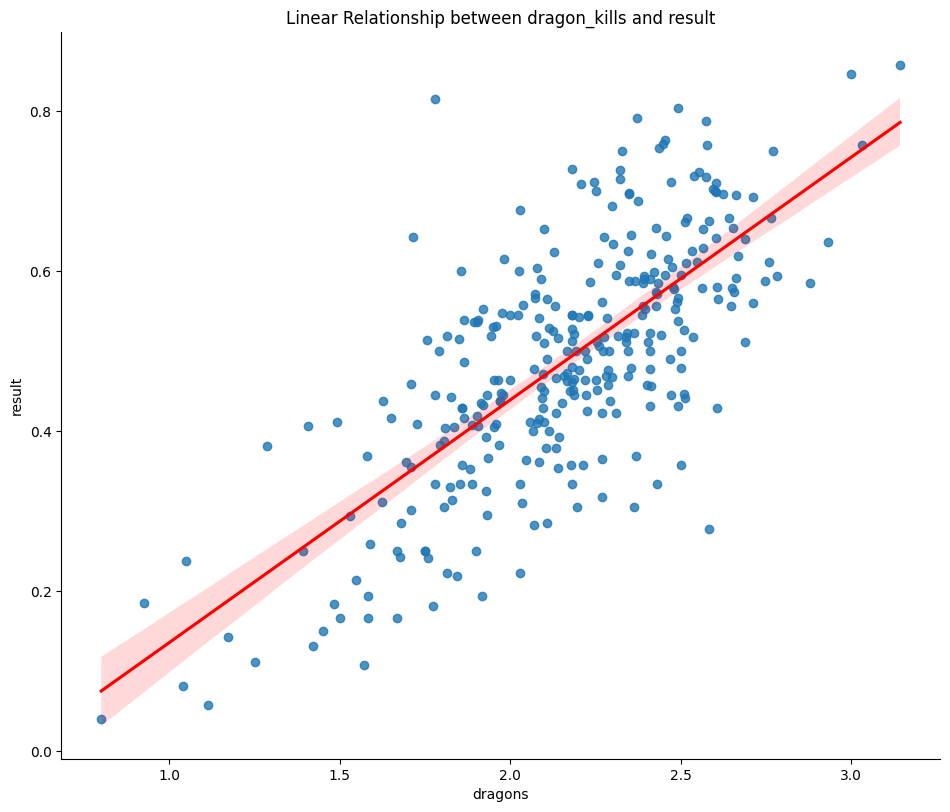

In [180]:
sb.lmplot(x='dragons', y='result', data=League_Object, height=8, aspect=1.2, line_kws={'color' : 'red'})
plt.title('Linear Relationship between dragon_kills and result')

plt.show()

전령 처치 수와 승률

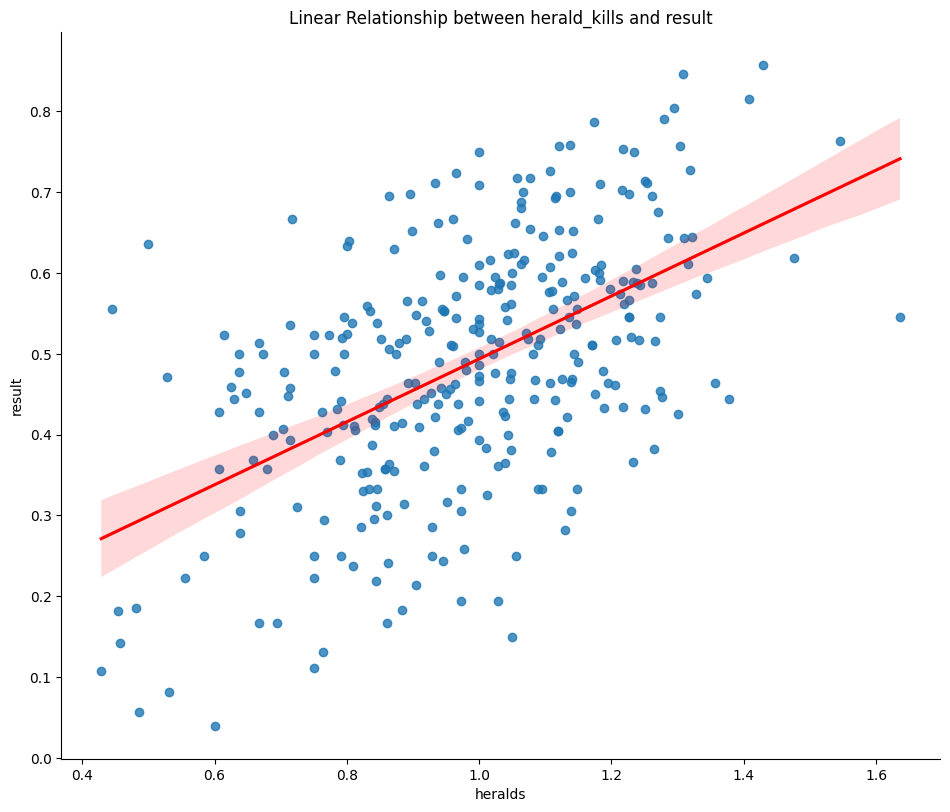

In [181]:
sb.lmplot(x='heralds', y='result', data=League_Object, height=8, aspect=1.2, line_kws={'color' : 'red'})
plt.title('Linear Relationship between herald_kills and result')

plt.show()

바론 처치 수와 승률

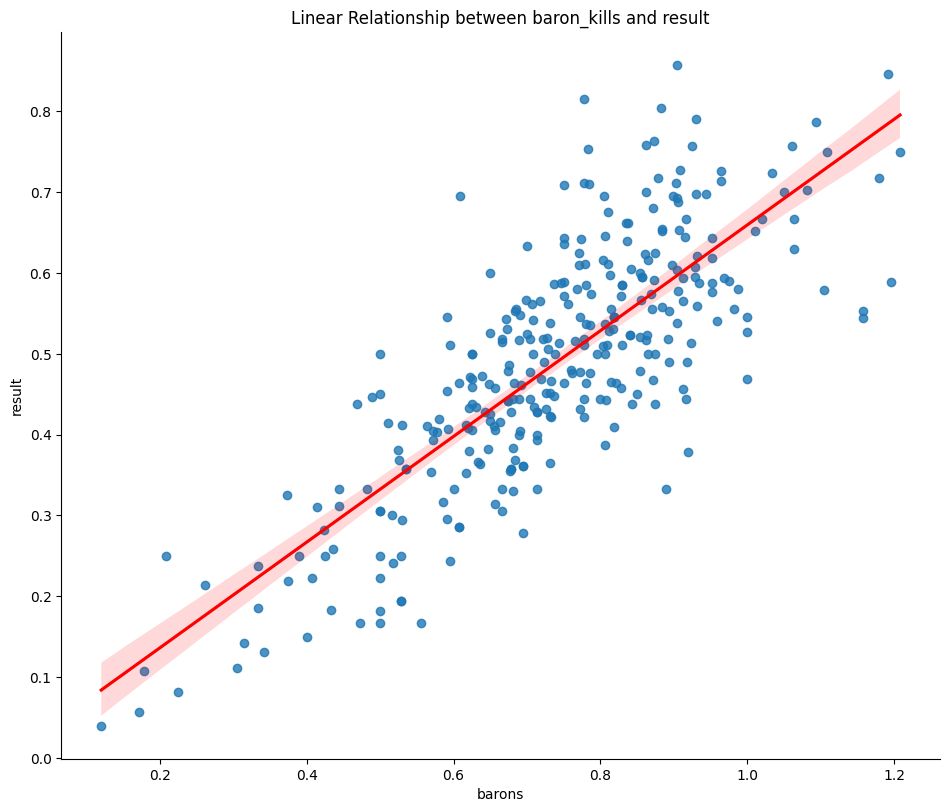

In [182]:
sb.lmplot(x='barons', y='result', data=League_Object, height=8, aspect=1.2, line_kws={'color' : 'red'})
plt.title('Linear Relationship between baron_kills and result')

plt.show()

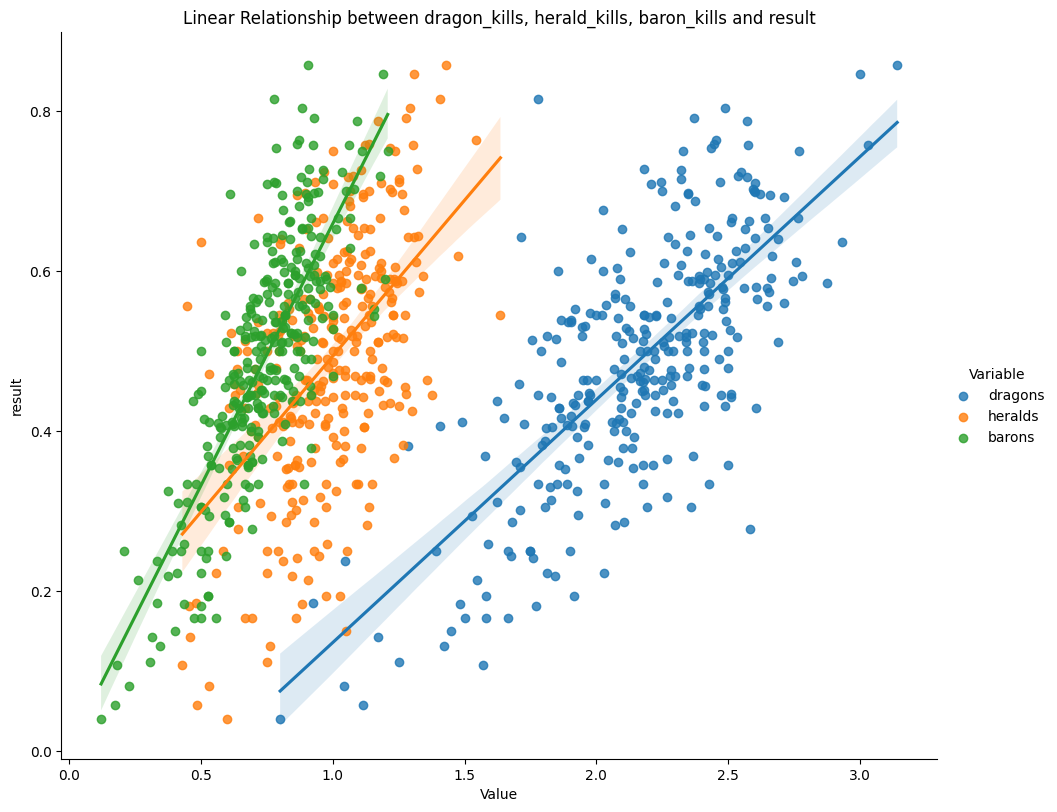

In [183]:
df = pd.melt(League_Object, id_vars=['result'], value_vars=['dragons', 'heralds', 'barons'], 
                   var_name='Variable', value_name='Value')
sb.lmplot(x='Value', y='result', hue='Variable', data=df, height=8, aspect=1.2)
plt.title('Linear Relationship between dragon_kills, herald_kills, baron_kills and result')

plt.show()